In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [3]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [4]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [5]:
X_train = X_train.float()
X_test = X_test.float()

In [6]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [7]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

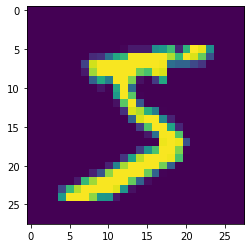

tensor(5)


In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [9]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [10]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [11]:
 torch.cuda.is_available()

True

In [12]:
# !nvidia-smi

In [13]:
 device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
 mnist_net = mnist_net.to(device)

In [14]:
loss = torch.nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)
#optimizer = torch.optim.RMSprop(mnist_net.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)
optimizer = torch.optim.Adadelta(mnist_net.parameters(), lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)
#optimizer = torch.optim.AdamW(mnist_net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)


In [15]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []
train_accuracy_history = []
train_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    train_loss_history.append(loss(preds, y_batch).data.cpu())
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (preds.argmax(dim=1) == y_batch).float().mean().data.cpu()
    train_accuracy_history.append(accuracy)
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

accuracies_train = train_accuracy_history
accuracies_test = test_accuracy_history
losses_train = train_loss_history
losses_test = test_loss_history

tensor(0.9160, device='cuda:0')
tensor(0.9260, device='cuda:0')
tensor(0.9273, device='cuda:0')
tensor(0.9402, device='cuda:0')
tensor(0.9431, device='cuda:0')
tensor(0.9441, device='cuda:0')
tensor(0.9449, device='cuda:0')
tensor(0.9458, device='cuda:0')
tensor(0.9495, device='cuda:0')
tensor(0.9484, device='cuda:0')
tensor(0.9490, device='cuda:0')
tensor(0.9517, device='cuda:0')
tensor(0.9520, device='cuda:0')
tensor(0.9506, device='cuda:0')
tensor(0.9497, device='cuda:0')
tensor(0.9535, device='cuda:0')
tensor(0.9553, device='cuda:0')
tensor(0.9568, device='cuda:0')
tensor(0.9536, device='cuda:0')
tensor(0.9584, device='cuda:0')
tensor(0.9562, device='cuda:0')
tensor(0.9564, device='cuda:0')
tensor(0.9550, device='cuda:0')
tensor(0.9568, device='cuda:0')
tensor(0.9584, device='cuda:0')
tensor(0.9604, device='cuda:0')
tensor(0.9588, device='cuda:0')
tensor(0.9596, device='cuda:0')
tensor(0.9587, device='cuda:0')
tensor(0.9587, device='cuda:0')
tensor(0.9592, device='cuda:0')
tensor(0

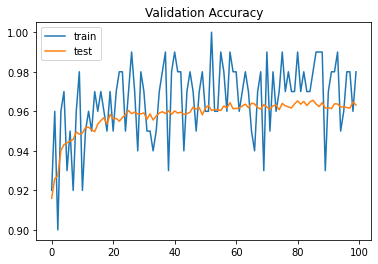

In [16]:
plt.plot(accuracies_train, label='train')
plt.plot(accuracies_test, label='test')
plt.legend()
plt.title('Validation Accuracy');

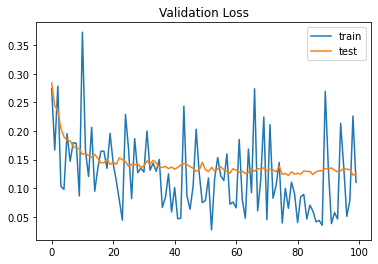

In [17]:
plt.plot(losses_train, label='train')
plt.plot(losses_test, label='test')
plt.legend()
plt.title('Validation Loss');

Accuracy на трейне и тесте значительно отличаются, accuracy на трейне имеет очень большую амплитуду и постоянно скачет, что приводит с разным значениям.

Аналогичная ситуация и с loss на трей и тесте. Loss на трейне также очень сильно скачет. Но переобучение отсутсвует.

При обучении 40 эпох максимальное значение accuracy равно 0.9493

При обучении 200 эпох максимальное значение accuracy равно 0.9626

CPU время выполнения 100 эпох 1 минута 41 секунда

GPU время выполнения 100 эпох 3 минуты 21 секунда

torch.backends.cudnn.deterministic = True ускоряет обучение, затраченное время с True (1.31 минута), а с False (1.49 минута)

Все тесты выполнены были с оптимизатором Adam

100 эпох
Оптимизатор Adam accuracy - 0.9594

Оптимизатор AdamW accuracy - 0.9588

Оптимизатор RMSprop accuracy - 0.9344

Оптимизатор Adadelta accuracy - 0.9647

